In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, \
                            roc_curve, f1_score, \
                            precision_recall_curve, roc_curve, \
                            auc, precision_score, recall_score, \
                            confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV
import matplotlib.pyplot as plt





Matplotlib created a temporary cache directory at /tmp/matplotlib-x9zdtnfp because the default path (/ephemeral/abaichorov/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Model training

## Embeding size 100

------------------------------------TRAINING INFO-------------------------------------------------
best_params for model is {'C': 100, 'kernel': 'poly'}
best_R2_score on train for model is 0.9733520004574063
Best Threshold is 0.09254465888832766 with F-Score=0.5806451612903225 on validation
------------------------------------TESTING INFO-------------------------------------------------
Roc_Auc on test - 0.9825326100994447
F1 on test - 0.6
precision on test - 0.6176470588235294
recall on test - 0.5833333333333334


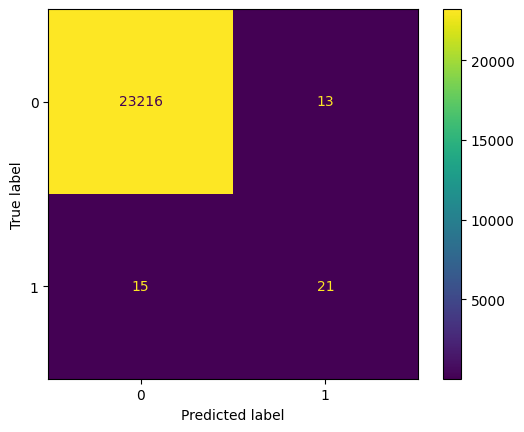

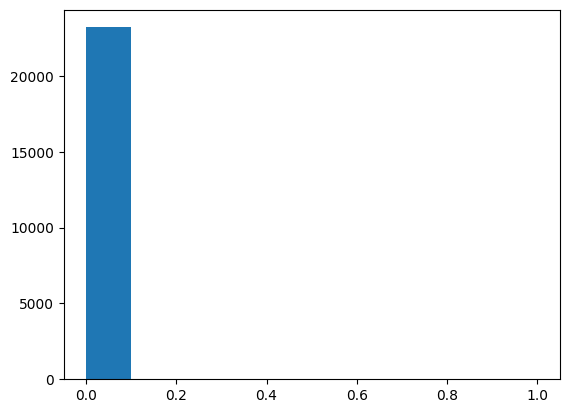

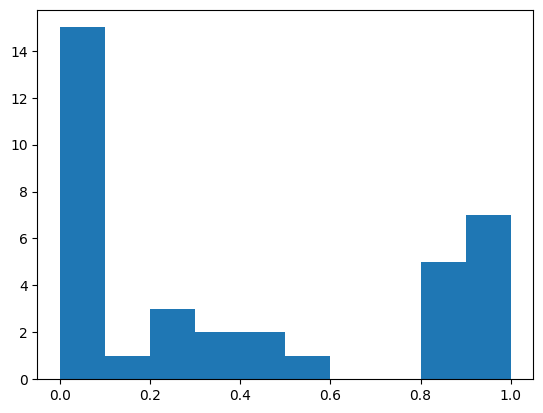

In [6]:
train = pd.read_csv('data_vectorized/train_100.csv', index_col=0)
val = pd.read_csv('data_vectorized/val_100.csv', index_col=0)
test = pd.read_csv('data_vectorized/test_100.csv', index_col=0)

from sklearn.svm import SVC

params = {'kernel': ['linear', 'poly', 'rbf'],
          'C': [0.1, 1, 10, 100, 200]}
skf = StratifiedKFold(n_splits=3)
model = GridSearchCV(SVC(probability=True, random_state=42),
                     params,
                     cv=skf,
                     scoring='roc_auc',
                     return_train_score=True,
                     verbose=0,
                     n_jobs=-1,
                     error_score='raise')
model.fit(train.drop(columns=['malicious']), train.malicious)

print('------------------------------------TRAINING INFO-------------------------------------------------')
print(f'best_params for model is {model.best_params_}')
print(f'best_R2_score on train for model is {model.best_score_}')


y_pred = model.predict_proba(val.drop(columns=['malicious']))[:,-1]
y_val = val.malicious

precision, recall, thresholds = precision_recall_curve(y_val, y_pred)
fscore = (2 * precision * recall) / (precision + recall)
fscore[np.isnan(fscore)] = -1  # for infinity

ix = np.argmax(fscore)
print(f'Best Threshold is {thresholds[ix]} with F-Score={fscore[ix]} on validation')
tr = thresholds[ix]

y_pred = model.predict_proba(test.drop(columns=['malicious']))[:,-1]
y_pred_c = (y_pred > tr)
y_test = test.malicious
print('------------------------------------TESTING INFO-------------------------------------------------')
print(f'Roc_Auc on test - {roc_auc_score(y_test, y_pred)}')
print(f'F1 on test - {f1_score(y_test, y_pred_c)}')
print(f'precision on test - {precision_score(y_test, y_pred_c)}')
print(f'recall on test - {recall_score(y_test, y_pred_c)}')

cm = confusion_matrix(y_test, y_pred_c, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=model.classes_)
disp.plot()
plt.show()

plt.hist(y_pred[y_test==0])
plt.show()
plt.hist(y_pred[y_test==1])
plt.show()


## Embeding size 256

------------------------------------TRAINING INFO-------------------------------------------------
best_params for model is {'C': 200, 'kernel': 'poly'}
best_R2_score on train for model is 0.9724312229284205
Best Threshold is 0.11714032206605907 with F-Score=0.6428571428571429 on validation
------------------------------------TESTING INFO-------------------------------------------------
Roc_Auc on test - 0.9780100066487771
F1 on test - 0.625
precision on test - 0.7142857142857143
recall on test - 0.5555555555555556


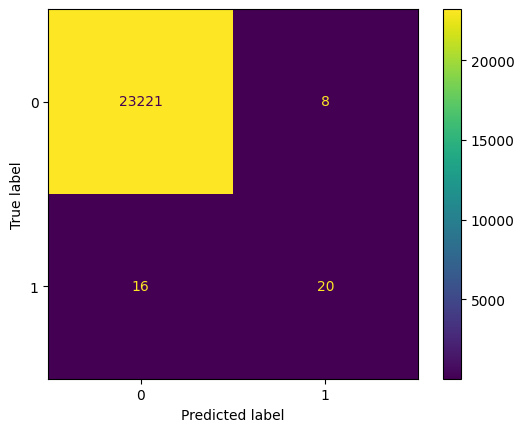

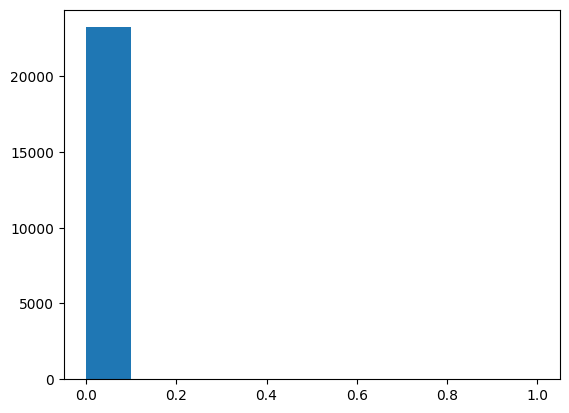

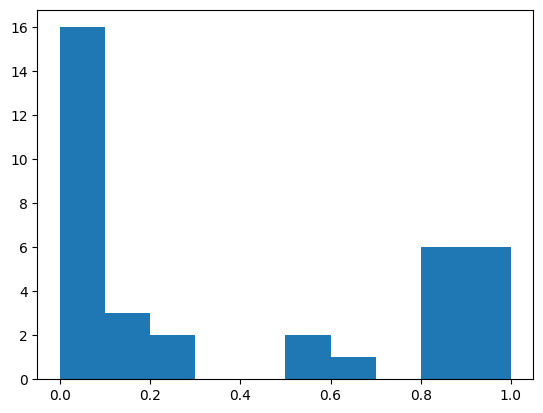

In [8]:
train = pd.read_csv('data_vectorized/train_256.csv', index_col=0)
val = pd.read_csv('data_vectorized/val_256.csv', index_col=0)
test = pd.read_csv('data_vectorized/test_256.csv', index_col=0)

from sklearn.svm import SVC

params = {'kernel': ['linear', 'poly', 'rbf'],
          'C': [0.1, 1, 10, 100, 200]}
skf = StratifiedKFold(n_splits=3)
model = GridSearchCV(SVC(probability=True, random_state=42),
                     params,
                     cv=skf,
                     scoring='roc_auc',
                     return_train_score=True,
                     verbose=0,
                     n_jobs=-1,
                     error_score='raise')
model.fit(train.drop(columns=['malicious']), train.malicious)

print('------------------------------------TRAINING INFO-------------------------------------------------')
print(f'best_params for model is {model.best_params_}')
print(f'best_R2_score on train for model is {model.best_score_}')


y_pred = model.predict_proba(val.drop(columns=['malicious']))[:,-1]
y_val = val.malicious

precision, recall, thresholds = precision_recall_curve(y_val, y_pred)
fscore = (2 * precision * recall) / (precision + recall)
fscore[np.isnan(fscore)] = -1  # for infinity

ix = np.argmax(fscore)
print(f'Best Threshold is {thresholds[ix]} with F-Score={fscore[ix]} on validation')
tr = thresholds[ix]

y_pred = model.predict_proba(test.drop(columns=['malicious']))[:,-1]
y_pred_c = (y_pred > tr)
y_test = test.malicious
print('------------------------------------TESTING INFO-------------------------------------------------')
print(f'Roc_Auc on test - {roc_auc_score(y_test, y_pred)}')
print(f'F1 on test - {f1_score(y_test, y_pred_c)}')
print(f'precision on test - {precision_score(y_test, y_pred_c)}')
print(f'recall on test - {recall_score(y_test, y_pred_c)}')

cm = confusion_matrix(y_test, y_pred_c, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=model.classes_)
disp.plot()
plt.show()

plt.hist(y_pred[y_test==0])
plt.show()
plt.hist(y_pred[y_test==1])
plt.show()

## Embeding size 512

------------------------------------TRAINING INFO-------------------------------------------------
best_params for model is {'C': 200, 'kernel': 'poly'}
best_R2_score on train for model is 0.9719506681068785
Best Threshold is 0.09333973971127782 with F-Score=0.6206896551724138 on validation
------------------------------------TESTING INFO-------------------------------------------------
Roc_Auc on test - 0.9735866565260857
F1 on test - 0.6268656716417911
precision on test - 0.6774193548387096
recall on test - 0.5833333333333334


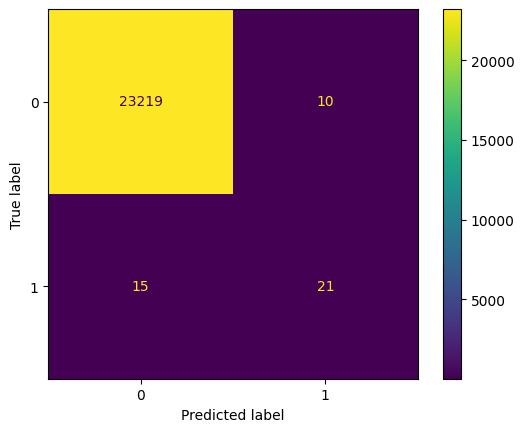

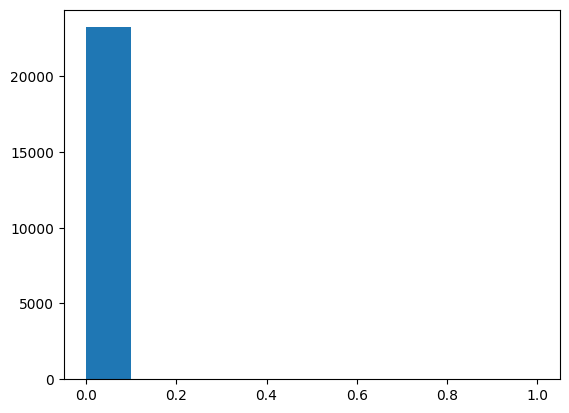

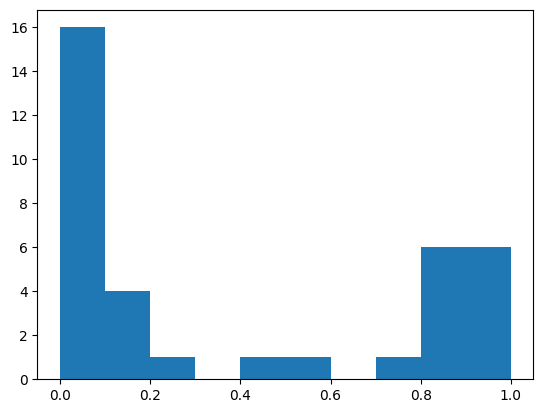

In [7]:
train = pd.read_csv('data_vectorized/train_512.csv', index_col=0)
val = pd.read_csv('data_vectorized/val_512.csv', index_col=0)
test = pd.read_csv('data_vectorized/test_512.csv', index_col=0)

from sklearn.svm import SVC

params = {'kernel': ['linear', 'poly', 'rbf'],
          'C': [0.1, 1, 10, 100, 200]}
skf = StratifiedKFold(n_splits=3)
model = GridSearchCV(SVC(probability=True, random_state=42),
                     params,
                     cv=skf,
                     scoring='roc_auc',
                     return_train_score=True,
                     verbose=0,
                     n_jobs=-1,
                     error_score='raise')
model.fit(train.drop(columns=['malicious']), train.malicious)

print('------------------------------------TRAINING INFO-------------------------------------------------')
print(f'best_params for model is {model.best_params_}')
print(f'best_R2_score on train for model is {model.best_score_}')


y_pred = model.predict_proba(val.drop(columns=['malicious']))[:,-1]
y_val = val.malicious

precision, recall, thresholds = precision_recall_curve(y_val, y_pred)
fscore = (2 * precision * recall) / (precision + recall)
fscore[np.isnan(fscore)] = -1  # for infinity

ix = np.argmax(fscore)
print(f'Best Threshold is {thresholds[ix]} with F-Score={fscore[ix]} on validation')
tr = thresholds[ix]

y_pred = model.predict_proba(test.drop(columns=['malicious']))[:,-1]
y_pred_c = (y_pred > tr)
y_test = test.malicious
print('------------------------------------TESTING INFO-------------------------------------------------')
print(f'Roc_Auc on test - {roc_auc_score(y_test, y_pred)}')
print(f'F1 on test - {f1_score(y_test, y_pred_c)}')
print(f'precision on test - {precision_score(y_test, y_pred_c)}')
print(f'recall on test - {recall_score(y_test, y_pred_c)}')

cm = confusion_matrix(y_test, y_pred_c, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=model.classes_)
disp.plot()
plt.show()

plt.hist(y_pred[y_test==0])
plt.show()
plt.hist(y_pred[y_test==1])
plt.show()